In [77]:
import dlib
import cv2 as cv
import numpy as np
import matplotlib.pylab as plt
from skimage.io import imread
from skimage.transform import downscale_local_mean
import copy

face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')

path = "src/"

# The number of images in the set that produce the gallery
NUMBER_OF_SUBJECTS = 16
IMAGE_WIDTH = 1000
IMAGE_HEIGHT = 1000
um = 100
ustd = 80
loaded_gallery = []

# Making galery images, normalizing them, and then displaying them
# plt.figure(figsize=(15,15))
for subject_num in range(0, NUMBER_OF_SUBJECTS):
    path = f'src/{subject_num}.jpg'
    img = cv.imread(path)
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    img = cv.GaussianBlur(img, (15,15), 0)
    image_downscaled = cv.resize(img, (1000,1000), interpolation = cv.INTER_AREA)
    loaded_gallery.append(image_downscaled)

In [78]:
# Print images
# Create visual grid
def print_images(images):
    plt.figure(figsize=(15,15))
    for i in range(NUMBER_OF_SUBJECTS):
        plt.subplot(4,4,i+1)
        plt.imshow(images[i], cmap='gray')

In [79]:
# Normalizing images
normalized_gallery = []
for i in range(NUMBER_OF_SUBJECTS):
    norm_img = np.zeros((1000, 1000))
    normalized_gallery.append(cv.normalize(loaded_gallery[i], norm_img, 0, 255, cv.NORM_MINMAX))

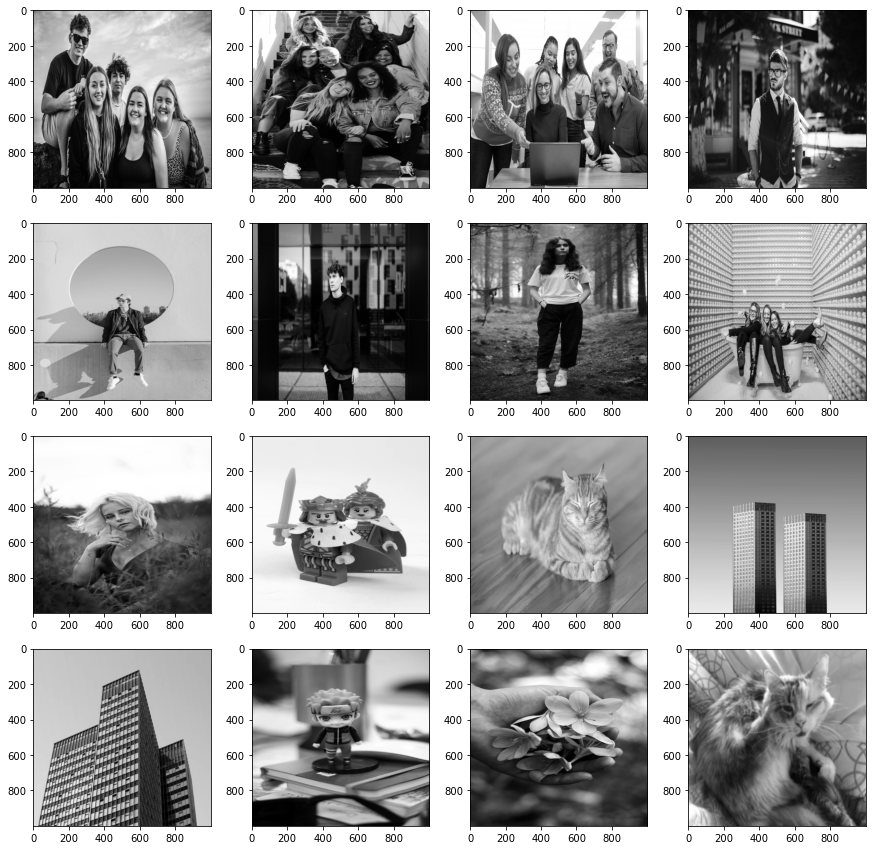

In [80]:
print_images(normalized_gallery)

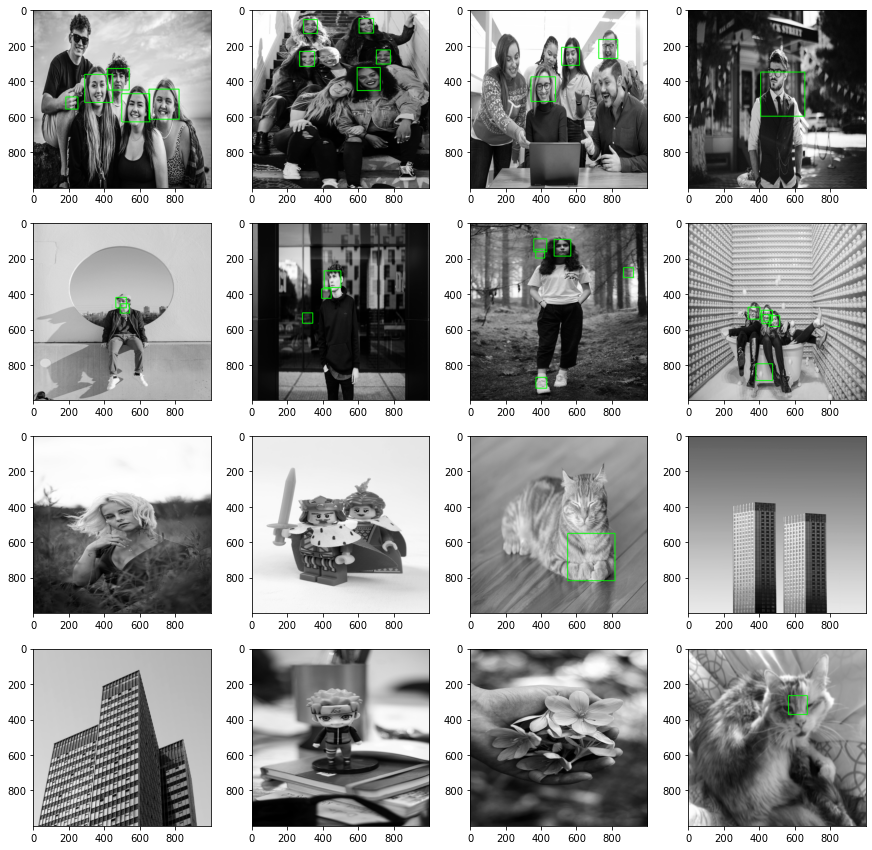

In [83]:
# Harr Image
haar_original = []
for i in range(NUMBER_OF_SUBJECTS):
    temp_img = copy.deepcopy(normalized_gallery[i]) # So that we do not alter the original image
    faces = face_cascade.detectMultiScale(temp_img, 1.1, 4)
    temp_img = cv.cvtColor(temp_img, cv.COLOR_GRAY2BGR)
    for (x,y,w,h) in faces:
        cv.rectangle(temp_img, (x,y), (x+w, y+h ), (0,255,0), 4)
    haar_original.append(temp_img)    
print_images(haar_original)